## Sentiment Analysis on US Airline Reviews

##TF_IDF

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
#drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)


# Veri setini yükle
#file_path = '/content/drive/My Drive/sentiment analysis/final_df.csv'
file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df.csv'
df = pd.read_csv(file_path, encoding='latin1', header=None)

# Sütun isimlerini belirle
df.columns = ['','text', 'score',]

# İlk sütunu kontrol edelim
print("Sütun isimleri:", df.columns)



Mounted at /content/drive
Sütun isimleri: Index(['', 'text', 'score'], dtype='object')


In [ ]:
# İsimsiz (NaN olarak görünen) sütunu kaldır
df = df.drop(columns=[df.columns[0]])

# Temizlenmiş veri setini kaydet
cleaned_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)



In [ ]:
# İlk 10 satırı ve sütun isimlerini göster
print("Sütun isimleri:", df.columns)
df.head(10)


Sütun isimleri: Index(['text', 'score'], dtype='object')


,text,score
0,text,score
1,SpiceJet to issue 6.4 crore warrants to promoters,0.0
2,MMTC Q2 net loss at Rs 10.4 crore,0.0
3,"Mid-cap funds can deliver more, stay put: Experts",1.0
4,Mid caps now turn into market darlings,1.0
5,"Market seeing patience, if not conviction: Pra...",0.0
6,Infosys: Will the strong volume growth sustain?,0.0
7,Hudco raises Rs 279 cr via tax-free bonds,1.0
8,HOEC could retest 30-35 levels: Ashwani Gujral,0.0
9,Genpact appoints Edward J Fitzpatrick as CFO,0.0


In [ ]:
# Eksik sütun var mı?
print("Eksik değerler:\n", df.isnull().sum())

# Tekrarlı satır kontrolü
duplicate_rows = df.duplicated().sum()
print(f"Tespit edilen tekrarlı satır sayısı: {duplicate_rows}")

# Satır sayısını bul
row_count = df.shape[0]
print(f"Toplam satır sayısı: {row_count}")

# Duygu skoru dağılımı
print("Duygu skoru dağılımı:\n", df['score'].value_counts())

Eksik değerler:
 text     0
score    0
dtype: int64
Tespit edilen tekrarlı satır sayısı: 5793
Toplam satır sayısı: 21863
Duygu skoru dağılımı:
 score
0.0      9939
1.0      7182
-1.0     4741
score       1
Name: count, dtype: int64


In [ ]:
# Tekrarlı satırları sil
df_cleaned = df.drop_duplicates()

# Temizlenmiş veriyi tekrar kaydet
cleaned_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_no_duplicates.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Yeni satır sayısını kontrol et
print(f"Tekrarlı satırlar silindi. Yeni satır sayısı: {df_cleaned.shape[0]}")


Tekrarlı satırlar silindi. Yeni satır sayısı: 16070


In [ ]:
# 'score' sütununu sayıya çevir (hatalı satırları düşürmek için errors='coerce' kullanıyoruz)
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# 'score' sütunundaki NaN değerleri olan satırları silelim
df = df.dropna(subset=['score'])

# 'score' sütununu tam sayı yapalım
df['score'] = df['score'].astype(int)

# Güncellenmiş duygu skoru dağılımını kontrol edelim
print("Duygu skoru dağılımı (temizlendikten sonra):\n", df['score'].value_counts())

# Negatif, nötr ve pozitif sınıfları tekrar ayıralım
df_negatif = df[df['score'] == -1]
df_notr = df[df['score'] == 0].sample(n=5000, random_state=42)  # 5000 satır örnekleme
df_pozitif = df[df['score'] == 1].sample(n=5000, random_state=42)  # 5000 satır örnekleme

# Yeni veri setini birleştir
df_balanced = pd.concat([df_negatif, df_notr, df_pozitif])

# Yeni veri setini kaydet
balanced_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_balanced.csv'
df_balanced.to_csv(balanced_file_path, index=False)

# Son durumu kontrol edelim
print("Duygu skoru dağılımı (son hali):\n", df_balanced['score'].value_counts())
print("İşlem tamamlandı. Yeni dosya kaydedildi:", balanced_file_path)


Duygu skoru dağılımı (temizlendikten sonra):
 score
 0    9939
 1    7182
-1    4741
Name: count, dtype: int64
Duygu skoru dağılımı (son hali):
 score
 0    5000
 1    5000
-1    4741
Name: count, dtype: int64
İşlem tamamlandı. Yeni dosya kaydedildi: /content/drive/My Drive/BitirmeMuammer/USAir/final_df_balanced.csv


<ipython-input-6-db3f6ba342c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['score'].astype(int)


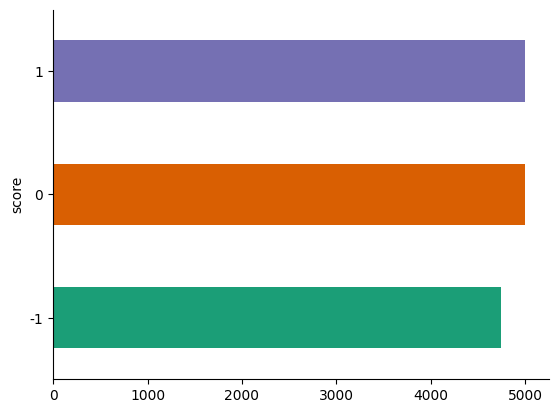

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_balanced.groupby('score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from nltk.stem import SnowballStemmer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))  # Bu satır hata verirse punkt yüklenmemiş demektir


/root/nltk_data/tokenizers/punkt


In [ ]:
"""import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)"""

In [ ]:
"""import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk verilerini indir (silme işleminden önce!)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Snowball Stemmer'ı başlat
stemmer = SnowballStemmer('english')

# Metin ön işleme fonksiyonu
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Örnek metin
example_text =
This is an example sentence! I can't believe it's already April 2025. Visit us at https://www.example.com
and check out our amazing deals! #exciting #new good better best driven drove driving ı was being deprecated


processed_text = preprocess_text(example_text)
print(processed_text)
"""

'import nltk\nfrom nltk.stem import SnowballStemmer\nimport string\nimport re\nfrom bs4 import BeautifulSoup\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\n\n# nltk verilerini indir (silme işleminden önce!)\nnltk.download(\'punkt\')\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n\n# Snowball Stemmer\'ı başlat\nstemmer = SnowballStemmer(\'english\')\n\n# Metin ön işleme fonksiyonu\ndef preprocess_text(text):\n    text = text.lower()\n    text = text.translate(str.maketrans(\'\', \'\', string.punctuation))\n    text = re.sub(r\'[^a-zA-Z\\s]\', \'\', text)\n    text = BeautifulSoup(text, "html.parser").get_text()\n    text = re.sub(r\'http\\S+|www\\S+\', \'\', text)\n    text = re.sub(r\'\\s+\', \' \', text).strip()\n\n    text = re.sub(r"i\'m", "i am", text)\n    text = re.sub(r"he\'s", "he is", text)\n    text = re.sub(r"she\'s", "she is", text)\n    text = re.sub(r"it\'s", "it is", text)\n    text = re.s

In [ ]:
# çalışan hali
import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')

# nltk verilerini indir (silme işleminden önce!)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Snowball Stemmer'ı başlat
stemmer = SnowballStemmer('english')

# Metin ön işleme fonksiyonu
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Örnek metin
example_text = """
This is an example sentence! I can't believe it's already April 2025. Visit us at https://www.example.com
and check out our amazing deals! #exciting #new good better best driven drove driving ı was being deprecated
"""

processed_text = preprocess_text(example_text)
print(processed_text)

exampl sentenc cant believ alreadi april visit u check amaz deal excit new good better best driven drove drive deprec


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


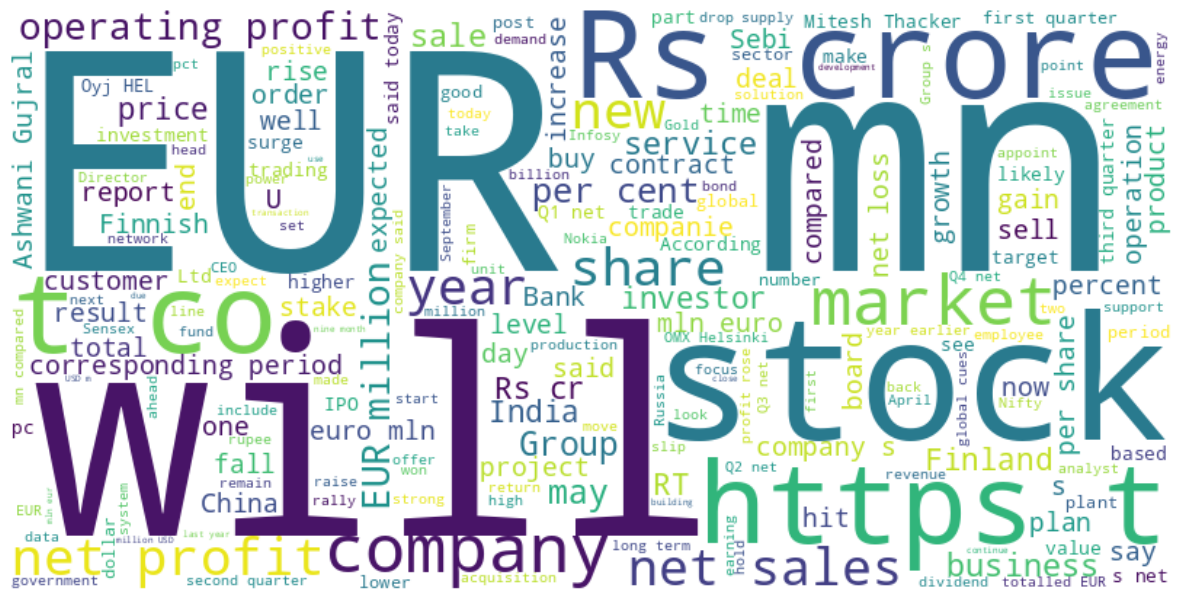

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = " ".join(tweet for tweet in df["text"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizleyelim
plt.show()


In [ ]:
# Eksik verileri kontrol etme
print(df.isnull().sum())


text     0
score    0
dtype: int64


In [ ]:
pip install nltk beautifulsoup4 requests


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.9 MB/s eta 0:00:00


In [ ]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
import contractions
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# NLTK için gerekli veri indirmeleri
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

# Lemmatizer ve stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Metni temizleme fonksiyonu
def clean_text(text):
    # HTML Etiketlerini kaldırma
    text = BeautifulSoup(text, "html.parser").get_text()

    # URL'leri kaldırma
    text = re.sub(r'(http|https)://\S+|www\.\S+', '', text)

    # Kısaltmaları genişletme
    text = contractions.fix(text)

    # Küçük harfe dönüştürme
    text = text.lower()

    # Özel karakterlerin, sayıları ve fazla boşlukları kaldırma
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords çıkarma ve lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Kelimeleri birleştir
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Örnek metin verisi
sample_text = """
    @User1 This is a sample text! It contains some numbers like 123 and special characters like #, $, @.
    Let's clean it up! Check out the website: http://example.com.
"""

# Temizlenmeden önceki metni gösterme
print("Orijinal Metin:")
print(sample_text)

# Metni temizleme
cleaned_text = clean_text(sample_text)

# Temizlenmiş metni gösterme
print("\nTemizlenmiş Metin:")
print(cleaned_text)

Orijinal Metin:

    @User1 This is a sample text! It contains some numbers like 123 and special characters like #, $, @.
    Let's clean it up! Check out the website: http://example.com.


Temizlenmiş Metin:
user sample text contains number like special character like let u clean check website


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


burada iki ayrı metin için analiz yapıyoruz. görüldüğü gibi iki cümlede de neutral değeri aynı.compound scordan yola çıkarak bir algoritma tasarlayacağız.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

score = analyzer.polarity_scores("We regret to inform you that the request product is unavailable.")

#scores: {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}


In [ ]:
score = analyzer.polarity_scores("It was a sunny morning of March with flowers blossoming everywhere.")

#scores: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}


In [ ]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['text'].apply(get_sentiment)


In [ ]:
df['sentiment']

,sentiment
1,neutral
2,negative
3,neutral
4,positive
5,neutral
...,...
21858,positive
21859,negative
21860,neutral
21861,positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd


randomState = 5

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentiment'],
    test_size=0.2,
    random_state=randomState,
    stratify=df['sentiment']
)


# Sınıf dağılımını al
classes = np.unique(y_train)  # Mevcut sınıfları al (-1, 1)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)

# Ağırlıkları bir sözlük olarak sakla
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print("Sınıf Ağırlıkları:", class_weight_dict)

train_df = pd.DataFrame({'text': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'text': X_test, 'sentiment': y_test})


Sınıf Ağırlıkları: {'negative': 2.3563729452977635, 'neutral': 0.7770816671109926, 'positive': 0.7759439194285461}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_features_test = tfidf_vectorizer.transform(X_test)



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=randomState)


In [ ]:
from sklearn.metrics import accuracy_score

svm_model.fit(tfidf_features_train, y_train)

y_pred = svm_model.predict(tfidf_features_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.8838326091927738


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# 1. SVM Modelini oluşturma
svm_model = make_pipeline(
    TfidfVectorizer(),  # Metni sayısal verilere dönüştürme
    SVC(kernel='rbf', random_state=randomState, class_weight=class_weight_dict)
)

# 2. Modeli eğitme
svm_model.fit(X_train, y_train)

# 3. Test verisiyle tahmin yapma
y_pred = svm_model.predict(X_test)

# 4. Sonuçları değerlendirme
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Skoru: 0.8856620169220215

Sınıflandırma Raporu:
               precision    recall  f1-score   support

    negative       0.88      0.71      0.79       619
     neutral       0.84      0.96      0.89      1876
    positive       0.94      0.87      0.91      1878

    accuracy                           0.89      4373
   macro avg       0.89      0.85      0.86      4373
weighted avg       0.89      0.89      0.88      4373



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Create a pipeline that first converts text to numerical features and then trains the SVC model
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='rbf', random_state=randomState, class_weight=class_weight_dict))

# Train the model
svm_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc',
                 SVC(class_weight={'negative': 2.3563729452977635,
                                   'neutral': 0.7770816671109926,
                                   'positive': 0.7759439194285461},
                     random_state=5))])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Örnek pipeline oluşturma
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vektörleştirici
    ('classifier', RandomForestClassifier())  # Sınıflandırıcı
])

# Verileri ayırma
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=randomState)

# Pipeline'ı fit etme
pipeline.fit(X_train, y_train)

# Modeli değerlendirme
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9028127143837182


###### LOG REG

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(17489, 10000) (4373, 10000)


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()

log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  90.9444317402241


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

    negative       0.88      0.75      0.81       607
     neutral       0.89      0.96      0.92      1954
    positive       0.95      0.91      0.93      1812

    accuracy                           0.91      4373
   macro avg       0.90      0.87      0.89      4373
weighted avg       0.91      0.91      0.91      4373



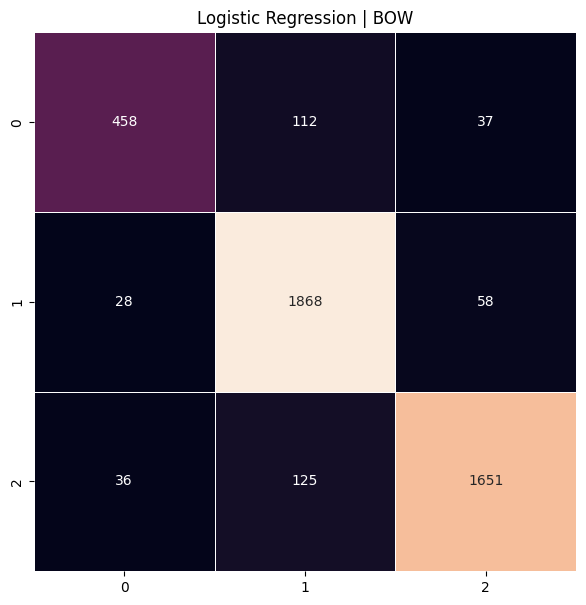

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  93.59707294763321


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

    negative       0.86      0.84      0.85       607
     neutral       0.95      0.97      0.96      1954
    positive       0.95      0.94      0.94      1812

    accuracy                           0.94      4373
   macro avg       0.92      0.91      0.92      4373
weighted avg       0.94      0.94      0.94      4373



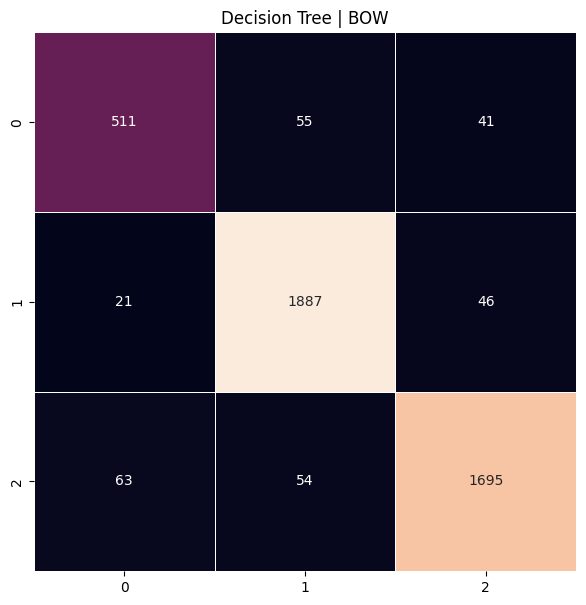

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

\## LSTM

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
#drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)


# Veri setini yükle
#file_path = '/content/drive/My Drive/sentiment analysis/final_df.csv'
file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df.csv'
df = pd.read_csv(file_path, encoding='latin1', header=None)

# Sütun isimlerini belirle
df.columns = ['','text', 'score',]

# İlk sütunu kontrol edelim
print("Sütun isimleri:", df.columns)



Mounted at /content/drive
Sütun isimleri: Index(['', 'text', 'score'], dtype='object')


In [ ]:
# İsimsiz (NaN olarak görünen) sütunu kaldır
df = df.drop(columns=[df.columns[0]])

# Temizlenmiş veri setini kaydet
cleaned_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)



In [ ]:
# İlk 10 satırı ve sütun isimlerini göster
print("Sütun isimleri:", df.columns)
df.head(10)


Sütun isimleri: Index(['text', 'score'], dtype='object')


,text,score
0,text,score
1,SpiceJet to issue 6.4 crore warrants to promoters,0.0
2,MMTC Q2 net loss at Rs 10.4 crore,0.0
3,"Mid-cap funds can deliver more, stay put: Experts",1.0
4,Mid caps now turn into market darlings,1.0
5,"Market seeing patience, if not conviction: Pra...",0.0
6,Infosys: Will the strong volume growth sustain?,0.0
7,Hudco raises Rs 279 cr via tax-free bonds,1.0
8,HOEC could retest 30-35 levels: Ashwani Gujral,0.0
9,Genpact appoints Edward J Fitzpatrick as CFO,0.0


In [ ]:
# Eksik sütun var mı?
print("Eksik değerler:\n", df.isnull().sum())

# Tekrarlı satır kontrolü
duplicate_rows = df.duplicated().sum()
print(f"Tespit edilen tekrarlı satır sayısı: {duplicate_rows}")

# Satır sayısını bul
row_count = df.shape[0]
print(f"Toplam satır sayısı: {row_count}")

# Duygu skoru dağılımı
print("Duygu skoru dağılımı:\n", df['score'].value_counts())

Eksik değerler:
 text     0
score    0
dtype: int64
Tespit edilen tekrarlı satır sayısı: 5793
Toplam satır sayısı: 21863
Duygu skoru dağılımı:
 score
0.0      9939
1.0      7182
-1.0     4741
score       1
Name: count, dtype: int64


In [ ]:
# Tekrarlı satırları sil
df_cleaned = df.drop_duplicates()

# Temizlenmiş veriyi tekrar kaydet
cleaned_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_no_duplicates.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Yeni satır sayısını kontrol et
print(f"Tekrarlı satırlar silindi. Yeni satır sayısı: {df_cleaned.shape[0]}")


Tekrarlı satırlar silindi. Yeni satır sayısı: 16070


In [ ]:
# 'score' sütununu sayıya çevir (hatalı satırları düşürmek için errors='coerce' kullanıyoruz)
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# 'score' sütunundaki NaN değerleri olan satırları silelim
df = df.dropna(subset=['score'])

# 'score' sütununu tam sayı yapalım
df['score'] = df['score'].astype(int)

# Güncellenmiş duygu skoru dağılımını kontrol edelim
print("Duygu skoru dağılımı (temizlendikten sonra):\n", df['score'].value_counts())

# Negatif, nötr ve pozitif sınıfları tekrar ayıralım
df_negatif = df[df['score'] == -1]
df_notr = df[df['score'] == 0].sample(n=5000, random_state=42)  # 5000 satır örnekleme
df_pozitif = df[df['score'] == 1].sample(n=5000, random_state=42)  # 5000 satır örnekleme

# Yeni veri setini birleştir
df_balanced = pd.concat([df_negatif, df_notr, df_pozitif])

# Yeni veri setini kaydet
balanced_file_path = '/content/drive/My Drive/BitirmeMuammer/USAir/final_df_balanced.csv'
df_balanced.to_csv(balanced_file_path, index=False)

# Son durumu kontrol edelim
print("Duygu skoru dağılımı (son hali):\n", df_balanced['score'].value_counts())
print("İşlem tamamlandı. Yeni dosya kaydedildi:", balanced_file_path)


Duygu skoru dağılımı (temizlendikten sonra):
 score
 0    9939
 1    7182
-1    4741
Name: count, dtype: int64


<ipython-input-6-db3f6ba342c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['score'].astype(int)


Duygu skoru dağılımı (son hali):
 score
 0    5000
 1    5000
-1    4741
Name: count, dtype: int64
İşlem tamamlandı. Yeni dosya kaydedildi: /content/drive/My Drive/BitirmeMuammer/USAir/final_df_balanced.csv


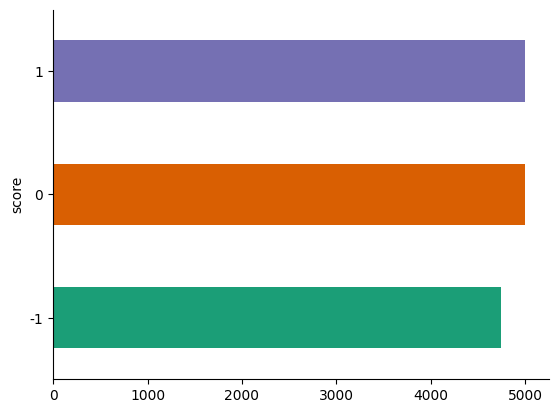

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_balanced.groupby('score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from nltk.stem import SnowballStemmer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))  # Bu satır hata verirse punkt yüklenmemiş demektir


/root/nltk_data/tokenizers/punkt


In [ ]:
import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)

In [ ]:
"""import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk verilerini indir (silme işleminden önce!)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Snowball Stemmer'ı başlat
stemmer = SnowballStemmer('english')

# Metin ön işleme fonksiyonu
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Örnek metin
example_text =
This is an example sentence! I can't believe it's already April 2025. Visit us at https://www.example.com
and check out our amazing deals! #exciting #new good better best driven drove driving ı was being deprecated


processed_text = preprocess_text(example_text)
print(processed_text)
"""

'import nltk\nfrom nltk.stem import SnowballStemmer\nimport string\nimport re\nfrom bs4 import BeautifulSoup\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\n\n# nltk verilerini indir (silme işleminden önce!)\nnltk.download(\'punkt\')\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n\n# Snowball Stemmer\'ı başlat\nstemmer = SnowballStemmer(\'english\')\n\n# Metin ön işleme fonksiyonu\ndef preprocess_text(text):\n    text = text.lower()\n    text = text.translate(str.maketrans(\'\', \'\', string.punctuation))\n    text = re.sub(r\'[^a-zA-Z\\s]\', \'\', text)\n    text = BeautifulSoup(text, "html.parser").get_text()\n    text = re.sub(r\'http\\S+|www\\S+\', \'\', text)\n    text = re.sub(r\'\\s+\', \' \', text).strip()\n\n    text = re.sub(r"i\'m", "i am", text)\n    text = re.sub(r"he\'s", "he is", text)\n    text = re.sub(r"she\'s", "she is", text)\n    text = re.sub(r"it\'s", "it is", text)\n    text = re.s

In [ ]:
# çalışan hali
import nltk
from nltk.stem import SnowballStemmer
import string
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')

# nltk verilerini indir (silme işleminden önce!)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Snowball Stemmer'ı başlat
stemmer = SnowballStemmer('english')

# Metin ön işleme fonksiyonu
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Örnek metin
example_text = """
This is an example sentence! I can't believe it's already April 2025. Visit us at https://www.example.com
and check out our amazing deals! #exciting #new good better best driven drove driving ı was being deprecated
"""

processed_text = preprocess_text(example_text)
print(processed_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = " ".join(tweet for tweet in df["text"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizleyelim
plt.show()


In [ ]:
# Eksik verileri kontrol etme
print(df.isnull().sum())


In [ ]:
pip install nltk beautifulsoup4 requests


In [ ]:
!pip install contractions

In [ ]:
import string
punc=string.punctuation
punc

In [ ]:
import re
import contractions
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# NLTK için gerekli veri indirmeleri
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

# Lemmatizer ve stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Metni temizleme fonksiyonu
def clean_text(text):
    # HTML Etiketlerini kaldırma
    text = BeautifulSoup(text, "html.parser").get_text()

    # URL'leri kaldırma
    text = re.sub(r'(http|https)://\S+|www\.\S+', '', text)

    # Kısaltmaları genişletme
    text = contractions.fix(text)

    # Küçük harfe dönüştürme
    text = text.lower()

    # Özel karakterlerin, sayıları ve fazla boşlukları kaldırma
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords çıkarma ve lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Kelimeleri birleştir
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Örnek metin verisi
sample_text = """
    @User1 This is a sample text! It contains some numbers like 123 and special characters like #, $, @.
    Let's clean it up! Check out the website: http://example.com.
"""

# Temizlenmeden önceki metni gösterme
print("Orijinal Metin:")
print(sample_text)

# Metni temizleme
cleaned_text = clean_text(sample_text)

# Temizlenmiş metni gösterme
print("\nTemizlenmiş Metin:")
print(cleaned_text)

In [ ]:
pip install vaderSentiment


burada iki ayrı metin için analiz yapıyoruz. görüldüğü gibi iki cümlede de neutral değeri aynı.compound scordan yola çıkarak bir algoritma tasarlayacağız.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

score = analyzer.polarity_scores("We regret to inform you that the request product is unavailable.")

#scores: {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}


In [ ]:
score = analyzer.polarity_scores("It was a sunny morning of March with flowers blossoming everywhere.")

#scores: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}


In [ ]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['text'].apply(get_sentiment)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd


randomState = 5

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentiment'],
    test_size=0.2,
    random_state=randomState,
    stratify=df['sentiment']
)


# Sınıf dağılımını al
classes = np.unique(y_train)  # Mevcut sınıfları al (-1, 1)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)

# Ağırlıkları bir sözlük olarak sakla
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print("Sınıf Ağırlıkları:", class_weight_dict)

train_df = pd.DataFrame({'text': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'text': X_test, 'sentiment': y_test})


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_features_test = tfidf_vectorizer.transform(X_test)



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=randomState)


In [ ]:
from sklearn.metrics import accuracy_score

svm_model.fit(tfidf_features_train, y_train)

y_pred = svm_model.predict(tfidf_features_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# 1. SVM Modelini oluşturma
svm_model = make_pipeline(
    TfidfVectorizer(),  # Metni sayısal verilere dönüştürme
    SVC(kernel='rbf', random_state=randomState, class_weight=class_weight_dict)
)

# 2. Modeli eğitme
svm_model.fit(X_train, y_train)

# 3. Test verisiyle tahmin yapma
y_pred = svm_model.predict(X_test)

# 4. Sonuçları değerlendirme
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Create a pipeline that first converts text to numerical features and then trains the SVC model
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='rbf', random_state=randomState, class_weight=class_weight_dict))

# Train the model
svm_model.fit(X_train, y_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Örnek pipeline oluşturma
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vektörleştirici
    ('classifier', RandomForestClassifier())  # Sınıflandırıcı
])

# Verileri ayırma
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=randomState)

# Pipeline'ı fit etme
pipeline.fit(X_train, y_train)

# Modeli değerlendirme
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


###### LOG REG

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()

log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

## [LSTM](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


#### Dosya yükle ve ön işleme yap

In [1]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [2]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
import numpy as np
import gensim
from gensim.models import Word2Vec

print(np.__version__)
print(gensim.__version__)

1.26.4
4.3.3


In [4]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/kaggle/input/amazon-product-reviews/amazon.csv

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BitirmeMuammer/imdb/

Mounted at /content/drive
/content/drive/My Drive/BitirmeMuammer/imdb


In [7]:
train_df = pd.read_csv("IMDB_Dataset.csv",encoding='latin1', header=None)
# Sütun isimlerini belirle
train_df.columns = ['review', 'sentiment',]

# İlk sütunu kontrol edelim
print("Sütun isimleri:", train_df.columns)


Sütun isimleri: Index(['review', 'sentiment'], dtype='object')


In [8]:
train_df.isnull().values.any()

False

In [9]:
train_df = train_df.drop(train_df.index[0])

In [10]:
train_df.head()

,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\b(\w+)\s+(\1\s+){2,}', r'\1 ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
nltk.download('punkt_tab')     # bu özel hatayı çözmek için

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
# 3 dakika sürüyor
preprocess_data=lambda text:preprocess_text(text)
train_df["Text_prepro"]=train_df["review"].apply(preprocess_data)

In [14]:
train_df = train_df.drop(train_df.index[0])

In [15]:
train_df

,review,sentiment,Text_prepro
2,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
3,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
4,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's love time money visual stun f...
6,"Probably my all-time favorite movie, a story o...",positive,"probabl alltim favorit movi , stori selfless ,..."
...,...,...,...
49996,I thought this movie did a down right good job...,positive,thought movi right good job n't creativ origin...
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogu , bad act , idiot direc..."
49998,I am a Catholic taught in parochial elementary...,negative,"cathol taught parochi elementari school nun , ..."
49999,I'm going to have to disagree with the previou...,negative,'m go disagre previou comment side maltin one ...


In [16]:
X=train_df.drop(["review","sentiment"],axis=1)
y=train_df["sentiment"]

In [ ]:
X

In [ ]:
y

In [17]:
# 2 dakika
tokenized_documents=[preprocess_text2(doc) for doc in X["Text_prepro"]]

##### tokanize

In [19]:
tokenized_documents

[['wonder',
  'littl',
  'product',
  'br',
  'br',
  'film',
  'techniqu',
  'unassum',
  'oldtimebbc',
  'fashion',
  'give',
  'comfort',
  ',',
  'sometim',
  'discomfort',
  ',',
  'sen',
  'realism',
  'entir',
  'piec',
  'br',
  'br',
  'actor',
  'extrem',
  'well',
  'chosen',
  'michael',
  'sheen',
  'got',
  'polari',
  'voic',
  'pat',
  'truli',
  'see',
  'seamless',
  'edit',
  'guid',
  'refer',
  'william',
  "'",
  'diari',
  'entri',
  ',',
  'well',
  'worth',
  'watch',
  'terrificli',
  'written',
  'perform',
  'piec',
  'master',
  'product',
  'one',
  'great',
  'master',
  "'s",
  'comedi',
  'life',
  'br',
  'br',
  'realism',
  'realli',
  'come',
  'home',
  'littl',
  'thing',
  'fantasi',
  'guard',
  ',',
  'rather',
  'use',
  'tradit',
  "'dream",
  "'",
  'techniqu',
  'remain',
  'solid',
  'disappear',
  'play',
  'knowledg',
  'sen',
  ',',
  'particularli',
  'scene',
  'concern',
  'orton',
  'halliwel',
  'set',
  'particularli',
  'flat',
 

In [20]:
len(tokenized_documents)

49999

In [21]:
tokenized_documents[0]

['wonder',
 'littl',
 'product',
 'br',
 'br',
 'film',
 'techniqu',
 'unassum',
 'oldtimebbc',
 'fashion',
 'give',
 'comfort',
 ',',
 'sometim',
 'discomfort',
 ',',
 'sen',
 'realism',
 'entir',
 'piec',
 'br',
 'br',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 "'",
 'diari',
 'entri',
 ',',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 "'s",
 'comedi',
 'life',
 'br',
 'br',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 ',',
 'rather',
 'use',
 'tradit',
 "'dream",
 "'",
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sen',
 ',',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 "'s",
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [22]:
import numpy as np
import gensim
from gensim.models import Word2Vec

print(np.__version__)
print(gensim.__version__)


1.26.4
4.3.3


In [23]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [24]:
print(word2vec_model)

Word2Vec<vocab=135503, vector_size=100, alpha=0.025>


In [25]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
, : 0
's : 1
br : 2
movi : 3
film : 4
n't : 5
one : 6
like : 7
time : 8
good : 9
make : 10
charact : 11
get : 12
see : 13
watch : 14
would : 15
even : 16
stori : 17
realli : 18
scene : 19
' : 20
show : 21
look : 22
well : 23
much : 24
could : 25
end : 26
great : 27
peopl : 28
also : 29
bad : 30
go : 31
love : 32
think : 33
first : 34
play : 35
act : 36
way : 37
thing : 38
made : 39
know : 40
say : 41
seem : 42
come : 43
mani : 44
work : 45
want : 46
seen : 47
plot : 48
two : 49


In [26]:
max_length = train_df['Text_prepro'].apply(lambda x: len(x.split())).max()

In [27]:
max_length

1539

In [28]:
max_length_index = train_df['Text_prepro'].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 31482


In [29]:
train_df.at[max_length_index, 'Text_prepro']

"match tag team tabl match bubba ray spike dudley vs eddi guerrero chri benoit bubba ray spike dudley start thing tag team tabl match eddi guerrero chri benoit accord rule match , oppon go tabl order get win benoit guerrero heat earli take turn hammer first spike bubba ray german suplex benoit bubba took wind dudley brother spike tri help brother , refere restrain benoit guerrero gang corner benoit stomp away bubba , guerrero set tabl outsid spike dash ring somersault top rope onto guerrero outsid recov take care spike , guerrero slip tabl ring help wolverin set tandem set doubl superplex middl rope would put bubba tabl , spike knock tabl right brother came crash guerrero benoit prop anoth tabl corner tri irish whip spike , bubba dash block brother bubba caught fire lift oppon back bodi drop bubba slam guerrero spike stomp wolverin top rope bubba held benoit bay spike soar wassup headbutt shortli , benoit latch spike crossfac , match continu even spike tap bubba came brother 's rescu m

In [30]:
train_df.at[max_length_index, 'review']

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [31]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in X['Text_prepro']]]

In [32]:
len(sequences)

49999

In [33]:
sequences[0]

[111,
 55,
 222,
 2,
 2,
 4,
 1587,
 13214,
 60273,
 1093,
 59,
 1780,
 0,
 436,
 9178,
 0,
 199,
 1709,
 262,
 273,
 2,
 2,
 50,
 366,
 23,
 2000,
 416,
 3423,
 105,
 23625,
 411,
 2669,
 312,
 13,
 10618,
 456,
 1966,
 738,
 607,
 20,
 4749,
 2019,
 0,
 23,
 205,
 14,
 29903,
 380,
 64,
 273,
 703,
 222,
 6,
 27,
 703,
 1,
 116,
 57,
 2,
 2,
 1709,
 18,
 43,
 289,
 55,
 38,
 884,
 1719,
 0,
 177,
 67,
 1121,
 27975,
 20,
 1587,
 611,
 1042,
 1387,
 35,
 1541,
 199,
 0,
 504,
 19,
 897,
 14394,
 18784,
 95,
 504,
 973,
 18784,
 1,
 27909,
 3491,
 89,
 1881,
 280,
 23,
 153]

In [34]:
"""!pip install --upgrade numpy # Reinstall NumPy without specifying version
!pip install jax --upgrade  # Ensure compatibility between Jax and NumPy"""

'!pip install --upgrade numpy # Reinstall NumPy without specifying version\n!pip install jax --upgrade  # Ensure compatibility between Jax and NumPy'

In [35]:
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [36]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [37]:
padded_sequences.shape

(49999, 1539)

In [38]:
# score -1 0  1  olunca hata veriyor O yüzden altta score sütunu birer arttırıldı
#y = np.asarray(train_df['score'])

In [39]:
y = train_df['sentiment']
sentiment_map = {'negative' : 0, 'positive': 1}
y = np.array(y.map(sentiment_map))
y[:15]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [40]:
"""y = np.asarray(train_df['sentiment']) + 1"""


"y = np.asarray(train_df['sentiment']) + 1"

In [41]:
jumlah_kelas=len(train_df["sentiment"].unique())

In [42]:
jumlah_kelas

2

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

In [44]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [46]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [48]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(34999, 1539) (34999,)
(15000, 1539) (15000,)


In [49]:
print(X_train.dtype)
print(y_train.dtype)
print(X_val.dtype)
print(y_val.dtype)


int32
int64
int32
int64


In [50]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


#### Modeli Çalıştır

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1136s 8s/step - accuracy: 0.5156 - loss: 0.6928 - val_accuracy: 0.6195 - val_loss: 0.6918
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1158s 8s/step - accuracy: 0.5681 - loss: 0.6908 - val_accuracy: 0.5740 - val_loss: 0.6850
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1136s 8s/step - accuracy: 0.5962 - loss: 0.6766 - val_accuracy: 0.6401 - val_loss: 0.6549
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1188s 8s/step - accuracy: 0.6436 - loss: 0.6501 - val_accuracy: 0.6529 - val_loss: 0.6383
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1168s 8s/step - accuracy: 0.6553 - loss: 0.6336 - val_accuracy: 0.6612 - val_loss: 0.6206
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1161s 8s/step - accuracy: 0.6646 - loss: 0.6181 - val_accuracy: 0.6669 - val_loss: 0.6113
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1166s 8s/step - accuracy: 0.6710 - loss: 0.6107 - val_accuracy: 0.6690 - val_loss: 0.6066
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1160s 8s/step - accuracy: 0.6797 - loss: 0.6011 - 

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

#### Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

#### Konfigurasi Lapisan Embedding -Bobot Lapisan Embedding

In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

#### Grafikler

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model_Amazon_Product_Reviews.h5")
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)

## [W2V](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


###### Kütüphanelerin eklenmesi

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BitirmeMuammer/USAir/  #çalışılacak drve dizinni


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/BitirmeMuammer/USAir/ #çalışılacak drve dizinni'
/content


In [ ]:
data = pd.read_csv("final_df.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'final_df.csv'

In [ ]:
data['Text'].isnull().values.any()

False

In [ ]:
data.head()

,id,Text,Annotation,oh_label
index,,,,
5.770000e+17,5.770000e+17,@AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc,racism,1
5.410000e+17,5.410000e+17,#NULL!,none,0
5.680000e+17,5.680000e+17,@jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.,racism,1
5.770000e+17,5.770000e+17,"Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR",none,0
5.710000e+17,5.710000e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [ ]:
data.shape

(13471, 4)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
data['Text'] = data['Text'].values.astype('U')
"""data['Text'] = data['Comment'].values.astype('U')"""

"data['Text'] = data['Comment'].values.astype('U')"

In [ ]:
data['Text'].head()

index
5.770000e+17                           @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc
5.410000e+17                                                                                                                                     #NULL!
5.680000e+17    @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.
5.770000e+17                                            Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR
5.710000e+17                                                                                                     @carolinesinders @herecomesfran *hugs*
Name: Text, dtype: object

**Word Embeddings**
1. Word2Vec Embeddings

- 100 dim,
- cbow

In [ ]:
tokenized_tweet = data['Text'].head(13471).apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=100,
            window=5, # context window size
            min_count=2,
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['Text']), epochs=20)

(2933715, 4015260)

In [ ]:
tokenized_tweet


index
5.770000e+17                                             [@AAlwuhaib1977, Muslim, mob, violence, against, Hindus, in, Bangladesh, continues, in, 2014., #Islam, http://t.co/C1JBWJwuRc]
5.410000e+17                                                                                                                                                                   [#NULL!]
5.680000e+17              [@jncatron, @isra_jourisra, @AMPalestine, Islamophobia, is, like, the, idea, of, Naziphobia., Islam, is, a, religion, of, hate, and, it, must, be, outlawed.]
5.770000e+17                                                         [Finally, I'm, all, caught, up,, and, that, sudden, death, cook, off, looks, like, it's, gonna, be, intense, #MKR]
5.710000e+17                                                                                                                                 [@carolinesinders, @herecomesfran, *hugs*]
                                                                          

In [ ]:
tokenized_tweet.shape

(13471,)

In [ ]:
null_count = 0
from contextlib import nullcontext

# Örnek bir tokenized_tweet listesi oluşturalım
tokenized_tweet = [{"Text": "#NULL!"}, {"Text": "some_text"}, {"Text": "#NULL!"}]

# Sözlük olup olmadığını kontrol edelim ve "Text" anahtarının varlığını kontrol edelim
for tweet in tokenized_tweet:
    if isinstance(tweet, dict) and "Text" in tweet:
        if tweet["Text"] == '#NULL!':
            null_count += 1

print(null_count)


2


In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

In [ ]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(3, 100)

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(3, 100)

**2. Doc2Vec Embedding**

- 100 dim,




**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

###### **Word2Vec Features**

> Blok alıntı ekle



In [ ]:
from sklearn.model_selection import train_test_split

train_w2v = wordvec_df.iloc[:150000, :]
test_w2v = wordvec_df.iloc[150000:, :]
"""
# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['BinaryNumTarget'],random_state=42,test_size=0.2)
"""

# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['oh_label'],random_state=42,test_size=0.2)


ValueError: Found input variables with inconsistent numbers of samples: [3, 13471]

In [ ]:
test_w2v.shape

(0, 100)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lreg = linear_model.LogisticRegression()

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

# Assuming prediction_int is the binary predictions based on a threshold
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

f1_score_result = f1_score(yvalid, prediction_int)
print("F1 Score:", f1_score_result)


NameError: name 'xtrain_w2v' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     13076
           1       0.74      0.93      0.83     13764

    accuracy                           0.80     26840
   macro avg       0.82      0.79      0.79     26840
weighted avg       0.82      0.80      0.79     26840



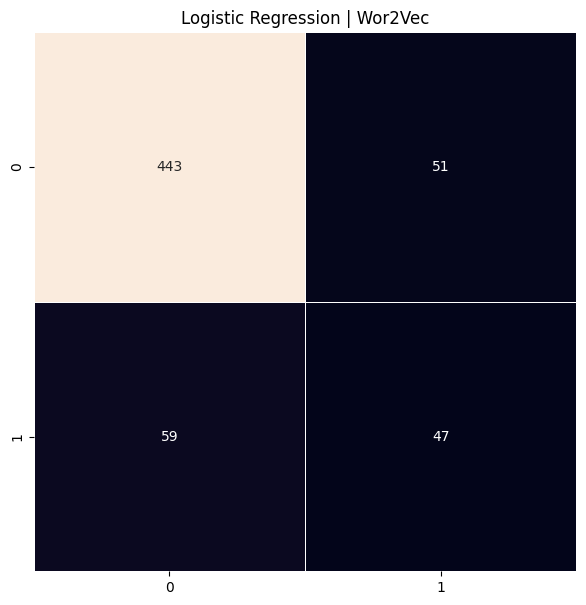

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | Wor2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


**2. Support Vector Machine**


> **Word2Vec Features**

In [ ]:
from sklearn import svm


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)


0.8277129408730415

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       494
           1       0.48      0.44      0.46       106

    accuracy                           0.82       600
   macro avg       0.68      0.67      0.68       600
weighted avg       0.81      0.82      0.81       600



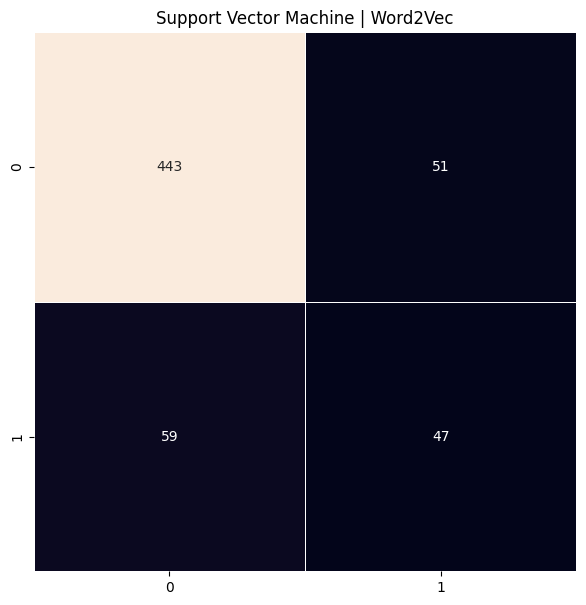

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int)
plt.figure(figsize=(7,7))
plt.title("Support Vector Machine | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

**3. dt**

>**Word2Vec Features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier().fit(xtrain_w2v, ytrain)

prediction_r = dt.predict(xvalid_w2v)
f1_score(yvalid, prediction_r)

0.3004291845493562

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_r))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       494
           1       0.28      0.33      0.30       106

    accuracy                           0.73       600
   macro avg       0.56      0.57      0.57       600
weighted avg       0.75      0.73      0.74       600



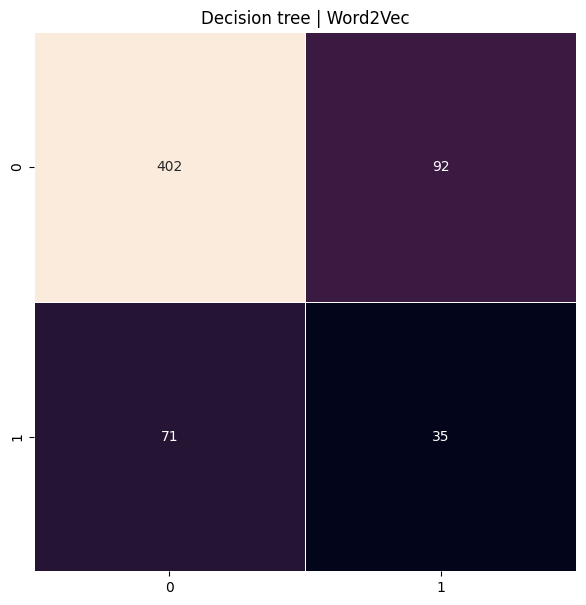

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_r)
plt.figure(figsize=(7,7))
plt.title("Decision tree | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

<a id="knn"></a>
###### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn=knn.fit(train_vectors, y_train)
predictions_knn = model_knn.predict(test_vectors)
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)





In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(7,7))
plt.title("KNN | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## [FAST TEXT embeding](#p1)

## [BOW](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)
    * #### [Decission Tree](#log)
    * #### [Random Forest](#log)
    
    

NB 78,64 -- SVM 85,32--LOG REG 85,41--DEC TREE 83,63--RAN FOREST 85,82

######Kütüphanelerin yüklenmesi

In [ ]:
# Burada numpy gensim ve scipy kütüphaneleri indirildi.
!pip install --upgrade --force-reinstall scipy gensim


  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64

Uyarıya rağmen:

gensim, scipy, numpy düzgün yüklenmiş.

Projeni çalıştırmayı deneyebilirsin.

In [ ]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
#import gensim
#from gensim.models.phrases import Phraser, Phrases
#from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

print("Her şey yolunda, devam edebilirsin! 🚀")


Her şey yolunda, devam edebilirsin! 🚀


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# burda hata oluştu çlışan kod altta
"""from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential"""

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [ ]:
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
# çalıştırma keras kuruldu
#!pip uninstall keras -y
#!pip install keras tensorflow


Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
!pip install nltk
from nltk.tokenize import word_tokenize


In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BitirmeMuammer/USAir/
df=pd.read_csv("final_df.csv",index_col=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BitirmeMuammer/USAir


In [ ]:
df.isnull().values.any()

df.head()

,text,score
0,SpiceJet to issue 6.4 crore warrants to promoters,0.0
1,MMTC Q2 net loss at Rs 10.4 crore,0.0
2,"Mid-cap funds can deliver more, stay put: Experts",1.0
3,Mid caps now turn into market darlings,1.0
4,"Market seeing patience, if not conviction: Prakash Diwan",0.0


In [ ]:
df.shape

(21862, 2)

In [ ]:
print(len(df))

21862


In [ ]:
df.Text=df.text

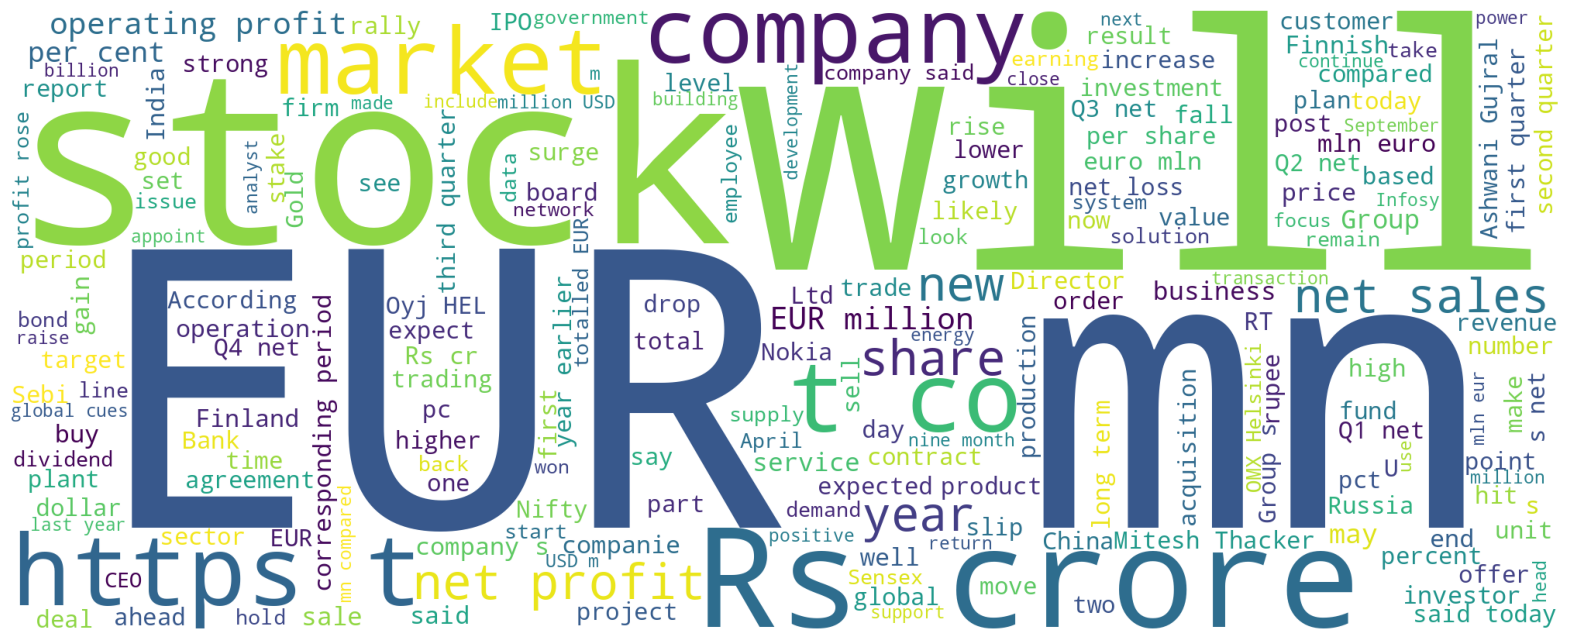

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X

['SpiceJet to issue crore warrants to promoters',
 'MMTC net loss at Rs crore',
 'Mid cap funds can deliver more stay put Experts',
 'Mid caps now turn into market darlings',
 'Market seeing patience if not conviction Prakash Diwan',
 'Infosys Will the strong volume growth sustain ',
 'Hudco raises Rs cr via tax free bonds',
 'HOEC could retest levels Ashwani Gujral',
 'Genpact appoints Edward Fitzpatrick as CFO',
 'EXL beats profit estimates cuts sales outlook',
 'Wait and watch on Bharti Airtel Vinay Khattar',
 'Would stick to banking Girish Pai Centrum Broking',
 'MSCI adds Aurobindo Pharma to India index',
 'Ashok Leyland raises Rs crore through QIP',
 'At Wipro growth remains mirage',
 'Why Chinese stocks leave US investors vulnerable',
 'US stocks finish mixed amid more tech selling',
 'Opec reduces estimate on oil demand growth',
 'Oil prices mixed ahead of US supply report',
 'Makemytrip expands share sale plan',
 'Gur closes quiet on some support',
 'Gur closes steady on low d

In [ ]:
y = df['score']

###### %30-70

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


In [ ]:
from sklearn import  preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

###### BOW

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(15303, 10000) (6559, 10000)


###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  76.62753468516541


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1422
           1       0.84      0.76      0.80      2982
           2       0.73      0.77      0.75      2155

    accuracy                           0.77      6559
   macro avg       0.75      0.77      0.76      6559
weighted avg       0.77      0.77      0.77      6559



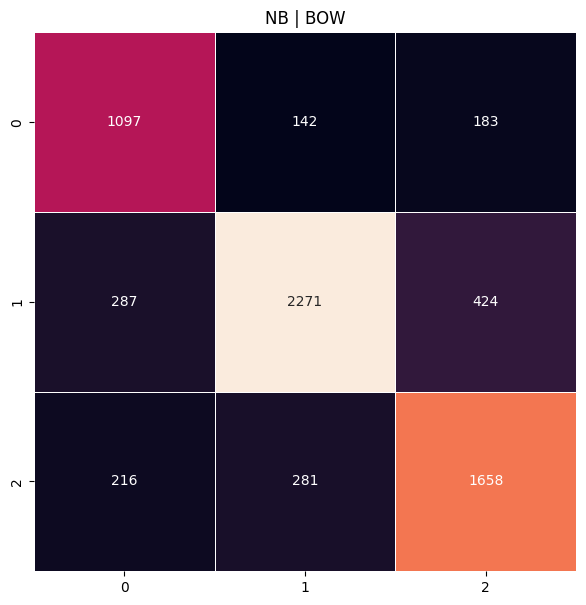

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### SVM

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations)
SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  83.8237536209788


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1422
           1       0.85      0.88      0.86      2982
           2       0.83      0.83      0.83      2155

    accuracy                           0.84      6559
   macro avg       0.83      0.82      0.83      6559
weighted avg       0.84      0.84      0.84      6559



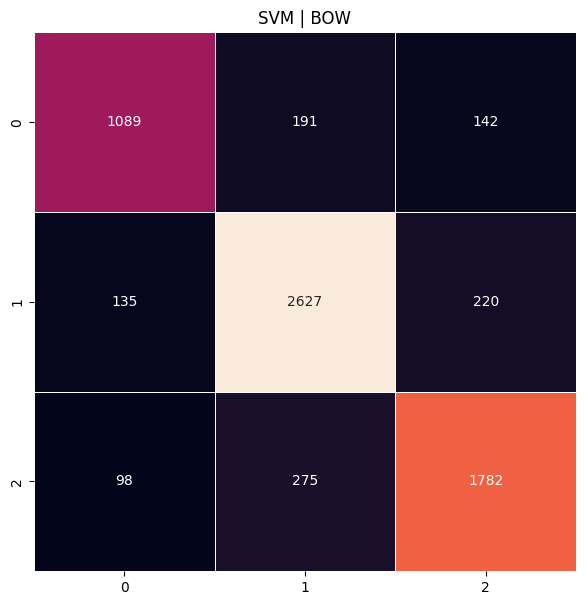

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### LOG REG

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  83.83899984753774


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1422
           1       0.84      0.89      0.87      2982
           2       0.84      0.82      0.83      2155

    accuracy                           0.84      6559
   macro avg       0.84      0.82      0.83      6559
weighted avg       0.84      0.84      0.84      6559



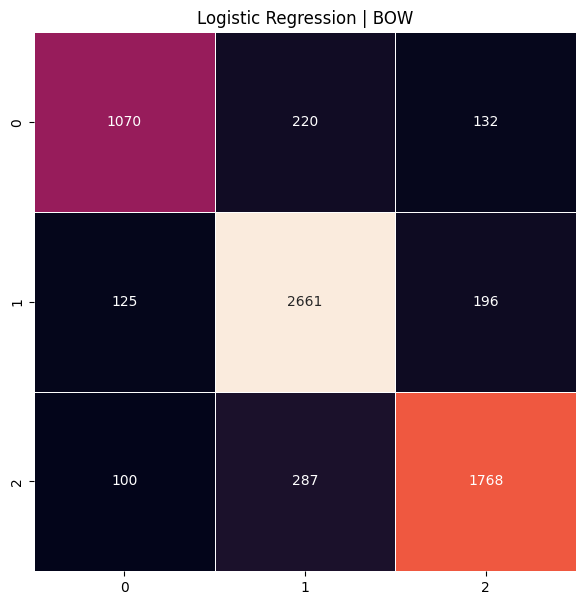

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  79.81399603598109


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80       497
           1       0.84      0.90      0.87       953
           2       0.83      0.81      0.82       737

    accuracy                           0.84      2187
   macro avg       0.84      0.82      0.83      2187
weighted avg       0.84      0.84      0.84      2187



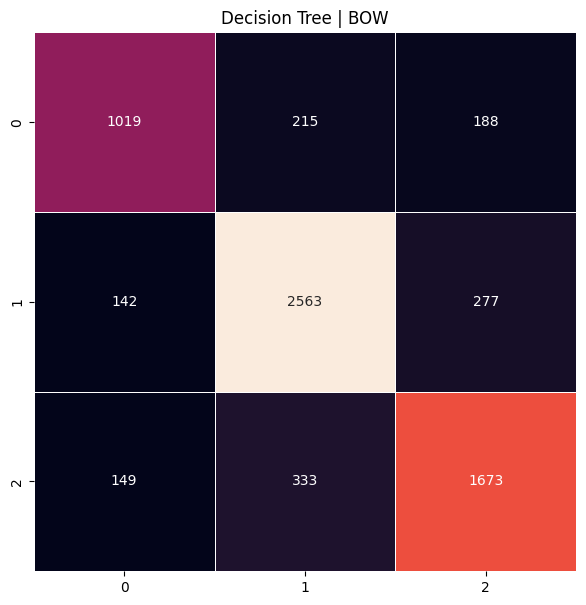

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  82.3906083244397


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       497
           1       0.82      0.95      0.88       953
           2       0.88      0.83      0.85       737

    accuracy                           0.86      2187
   macro avg       0.87      0.84      0.85      2187
weighted avg       0.86      0.86      0.86      2187



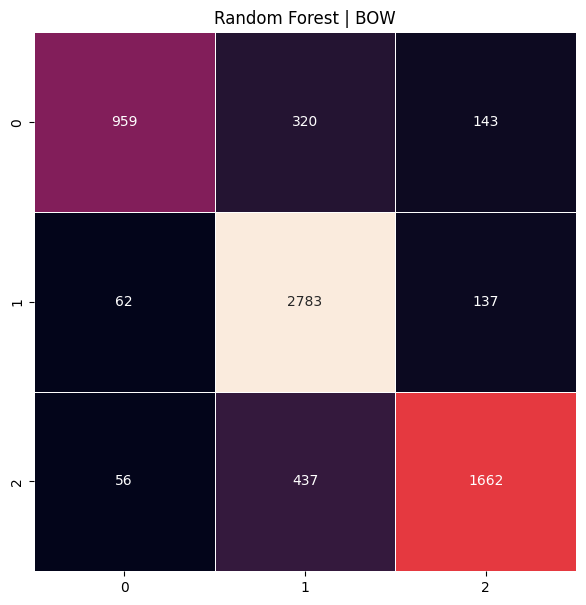

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | BOW")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()
